In [13]:
%pylab inline
import sys,re,string
import scipy.misc as sm

Populating the interactive namespace from numpy and matplotlib


In [46]:
nfile = 0
bins = -1
order = -1

infiles = ['/home/oliverphilcox/3pcf_code/codes/grid_multipoles/qpm-random-small.out']
numfiles=1

for filename in infiles:
    f = open(filename,'r')
    
    for line in f:
        if (re.match("Bins = ",line)):
            if (bins<0):
                bins = int(line.split()[-1])
                print("# Using %d bins" % (bins))
        if (re.match("Order = ",line)):
            if (order<0):
                order = int(line.split()[-1])
                print("# Using order %d" % (order))

                pairs = np.zeros((bins,numfiles))
                power = np.zeros((bins,bins,order+1,numfiles))

        if (re.match("#", line)):
            continue
        if (re.search("=", line)):
            continue
        if (re.search("There",line)):
            continue
        if (re.search("Average",line)):
            continue
        if (re.match("Multipole", line)):
            continue
        if (re.match("^$", line)):
            continue

        if (re.match("Pairs",line)):
            # We've found a pairs line.  Process it.
            b,cnt = (line.split()[1:-1])
            pairs[int(b),nfile] = int(cnt)
            continue

        # Otherwise, we have a power line, so process that
        s = line.split()
        b1 = int(s[0])
        b2 = int(s[1])
        p0 = float(s[2])
        for p in range(order+1):
            if (p==0):
                power[b1,b2,p,nfile] = p0
            else:
                power[b1,b2,p,nfile] = p0*float(s[2+p])


    # End loop over lines in a file
    nfile+=1
# End loop over files

# Using 18 bins
# Using order 10


In [47]:
# Fix the normalization of the C_ell
for ell in range(0,order+1):
    power[:,:,ell,:] *= (2.*ell+1.)/2.0

In [44]:
pairsD = np.average(pairs[:,0:-1],axis=1)
powerD = np.average(power[:,:,:,0:-1],axis=3)

/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


ValueError: x and y can be no greater than 2-D, but have shapes (18,) and (18, 18, 11, 1)

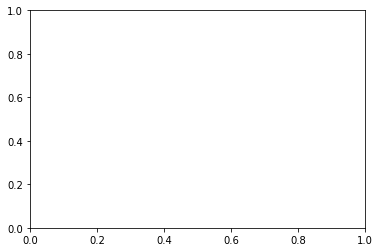

In [45]:
plt.plot(power)

In [32]:
power.shape

(18, 18, 11, 1)

In [26]:
s

['1',
 '1',
 '4.828651e+05',
 '1.055538e-01',
 '1.041385e-01',
 '1.035806e-01',
 '1.035217e-01',
 '1.035602e-01',
 '1.033871e-01',
 '1.034800e-01',
 '1.034757e-01',
 '1.034570e-01',
 '1.034883e-01']